In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scanpy.external as sce
import matplotlib.pyplot as plt
import math

In [10]:
adata = sc.read_h5ad('cache/793d0a72-abf5-4aca-8b58-a0e584e318d9/Bcells_processed_2023-11-22.h5ad')

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
adata

AnnData object with n_obs × n_vars = 178198 × 1278
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_

In [12]:
adata.obs.index=adata.obs['barcodes']

In [13]:
adata=adata.raw.to_adata()

In [14]:
igl_genes = [gene for gene in adata.var_names if gene.startswith("IGL")]
igk_genes = [gene for gene in adata.var_names if gene.startswith("IGK")]
ighc_genes = [gene for gene in adata.var_names if gene.startswith("IGH")]
exl_genes = igl_genes + igk_genes + ighc_genes

In [15]:
adata.raw=adata

In [17]:
adata

AnnData object with n_obs × n_vars = 178198 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var_names[adata.var['highly_variable']]]
filtered_genes = [gene for gene in adata.var_names if gene not in exl_genes]
adata = adata[:, filtered_genes]

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [19]:
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sce.pp.harmony_integrate(adata, 'cohort.cohortGuid',max_iter_harmony = 30)
sc.pp.neighbors(adata, n_neighbors=50,use_rep='X_pca_harmony', n_pcs=30)
sc.tl.umap(adata, min_dist=0.05)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
2023-11-26 17:43:12,230 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-11-26 17:44:10,940 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-11-26 17:44:11,847 - harmonypy - INFO - Iteration 1 of 30
2023-11-26 17:46:00,386 - harmonypy - INFO - Iteration 2 of 30
2023-11-26 17:47:49,020 - harmonypy - INFO - Iteration 3 of 30
2023-11-26 17:49:37,607 - harmonypy - INFO - Converged after 3 iterations


In [20]:
sc.tl.leiden(adata, resolution=2, key_added = "ms_leiden_2")

In [21]:
adata

AnnData object with n_obs × n_vars = 178198 × 1213
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_

In [22]:
adata.write_h5ad('B_cell_files/Bcells_processed_newUMAP_22112023.h5ad')

In [2]:
#START HERE FOR ALL B CELLS!
adata=sc.read_h5ad('B_cell_files/Bcells_processed_newUMAP_22112023.h5ad')

In [3]:
adata=adata.raw.to_adata()

In [4]:
adata

AnnData object with n_obs × n_vars = 178198 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
#DONE!
sc.tl.rank_genes_groups(adata, 'ms_leiden_2', method='wilcoxon')
df_adata=sc.get.rank_genes_groups_df(adata,group=None)
df=df_adata.groupby('group').head(20).reset_index(drop=True)

groups = df.groupby('group')

fig, axs = plt.subplots(5, 6, figsize=(10, 14), squeeze=True)
# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(groups):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(str(name)+" vs Rest")
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')
fig.tight_layout()
plt.savefig('B_cell_files/scatter_plot_22112023.png')

In [ ]:
#do not run
adata.write_h5ad('B_cell_files/Bcells_processed_newUMAP.h5ad')
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'ms_leiden_2', method='wilcoxon')

df_ms_res2=sc.get.rank_genes_groups_df(adata,group=None)
df=df_ms_res2.groupby('group').head(20).reset_index(drop=True)

groups = df.groupby('group')
fig, axs = plt.subplots(4, 6, figsize=(10, 14), squeeze=False)

# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(groups):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(str(name)+" vs Rest")
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')
fig.tight_layout()
plt.savefig('B_cell_files/scatter_plot_allBcell_newlabel.png')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


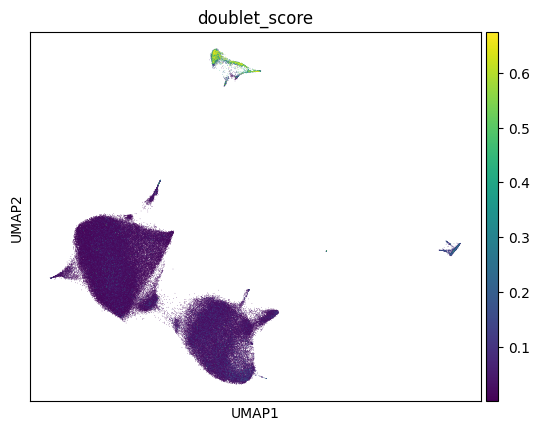

In [129]:
sc.pl.umap(adata, color=['doublet_score'])

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


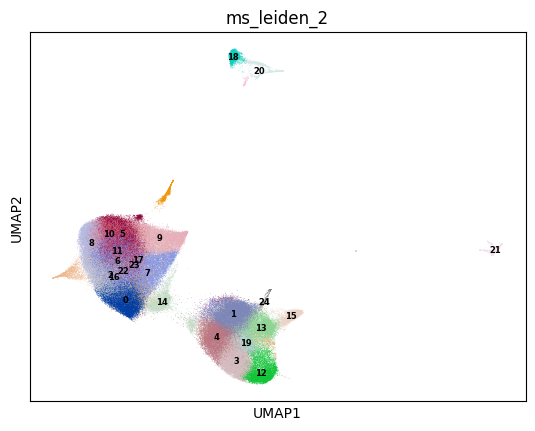

In [130]:
sc.pl.umap(adata, color = 'ms_leiden_2', legend_loc='on data', legend_fontsize=6)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignore

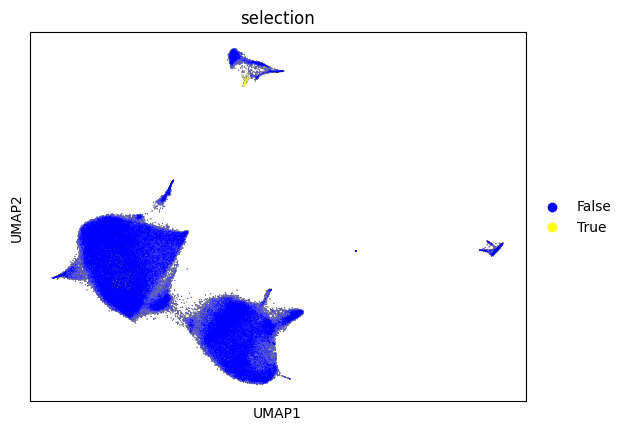

In [151]:
adata.obs['selection']=pd.Categorical(adata.obs['ms_leiden_2']=='22')
# adjust colors
adata.uns['selection_colors'] = ['blue', 'yellow']
sc.pl.umap(adata, color='selection', add_outline=True, s=1)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


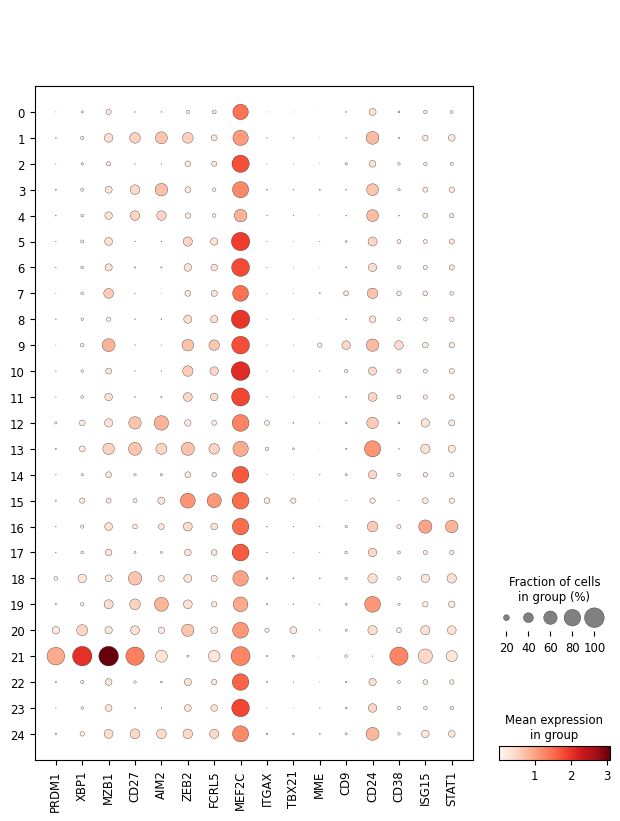

In [132]:
gene_symbols = ['PRDM1', 'XBP1', 'MZB1', 'CD27', 'AIM2', 'ZEB2', 'FCRL5', 'MEF2C', 'ITGAX', 'TBX21', 'MME', 'CD9', 'CD24', 'CD38', 'ISG15', 'STAT1']
sc.pl.dotplot(adata, gene_symbols, groupby='ms_leiden_2')

In [ ]:
adata

### IGH in plasma cells of BR1 vs BR2

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=Fal

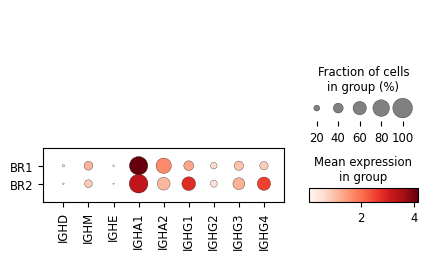

In [14]:
plasma_cluster = ["21"]
plasma=adata[adata.obs['ms_leiden_2'].isin(plasma_cluster)]
plasma = plasma[plasma.obs['cohort.cohortGuid'].isin(['BR1', 'BR2'])]
gene_symbols = ['IGHD', 'IGHM', 'IGHE', 'IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4']
sc.pl.dotplot(plasma, gene_symbols, groupby='cohort.cohortGuid')

/tmp/ipykernel_731/3908689451.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_gene_expression = adata.obs.groupby('subject.subjectGuid')[gene_symbols].mean()


KeyError: "Columns not found: 'IGHD', 'IGHA2', 'IGHM', 'IGHG1', 'IGHG4', 'IGHE', 'IGHG3', 'IGHA1', 'IGHG2'"

In [133]:
df = pd.DataFrame(adata.var)
colnames = df.index

In [134]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [135]:
markers_plasma = ['PRDM1', 'XBP1', 'MZB1']
markers_effector = ['CD27', 'ITGAX', 'TBX21', 'ZEB2', 'FCRL5', 'MEF2C']
markers_transitiotnal = ['MME', 'CD9', 'CD24', 'CD38']
markers_naive = ['IGHD', 'CD27', 'CD44', 'CD9', 'STAT1', 'IFI44L']
markers_memory = ['CD27', 'AIM2', 'IGHD']
markers_t2 = ['FCER2', 'IL4R', 'IGHE', 'MEF2C']
markers_cd95 = ['CD27', 'AIM2', 'FAS']
markers_hbb = ['HBB', 'HBA2', 'HBA1']
marers_isg_naive = ['IFI44L', 'STAT1']

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


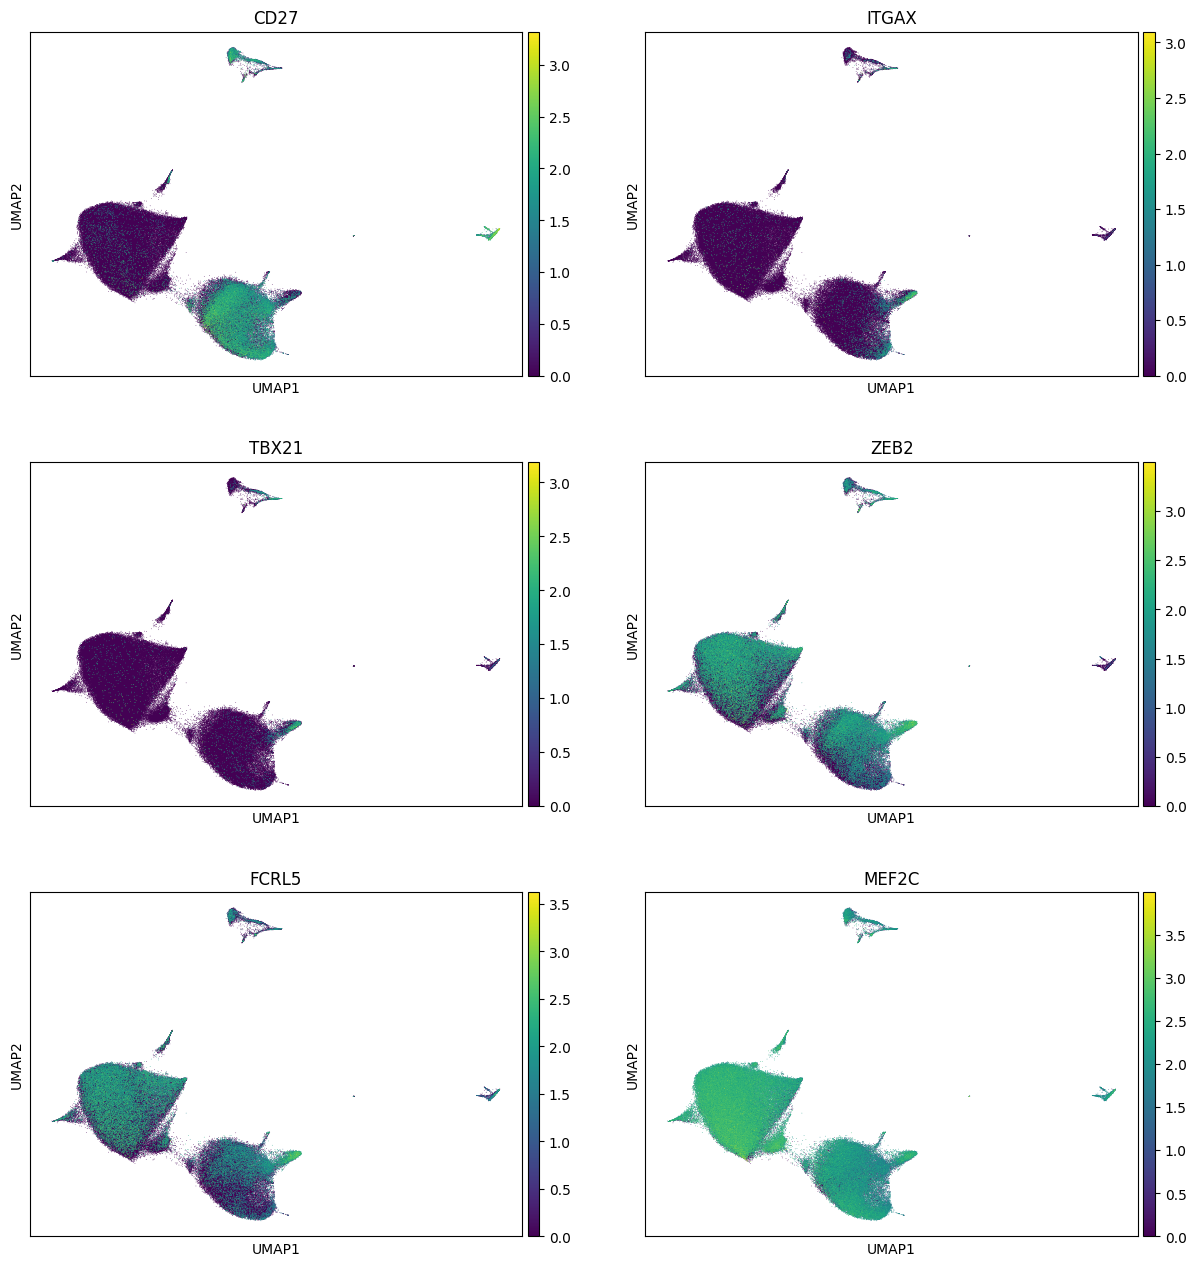

In [136]:
sc.pl.umap(adata, color=markers_effector, size=1, ncols=2, frameon=True)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'leiden_resolution_2'}, xlabel='UMAP1', ylabel='UMAP2'>

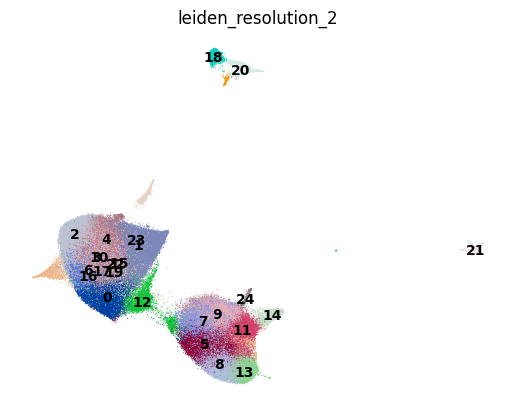

In [137]:
sc.pl.umap(adata, color=['leiden_resolution_2'], legend_loc='on data',
           size=2,show=False,ncols=1 ,frameon=False)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

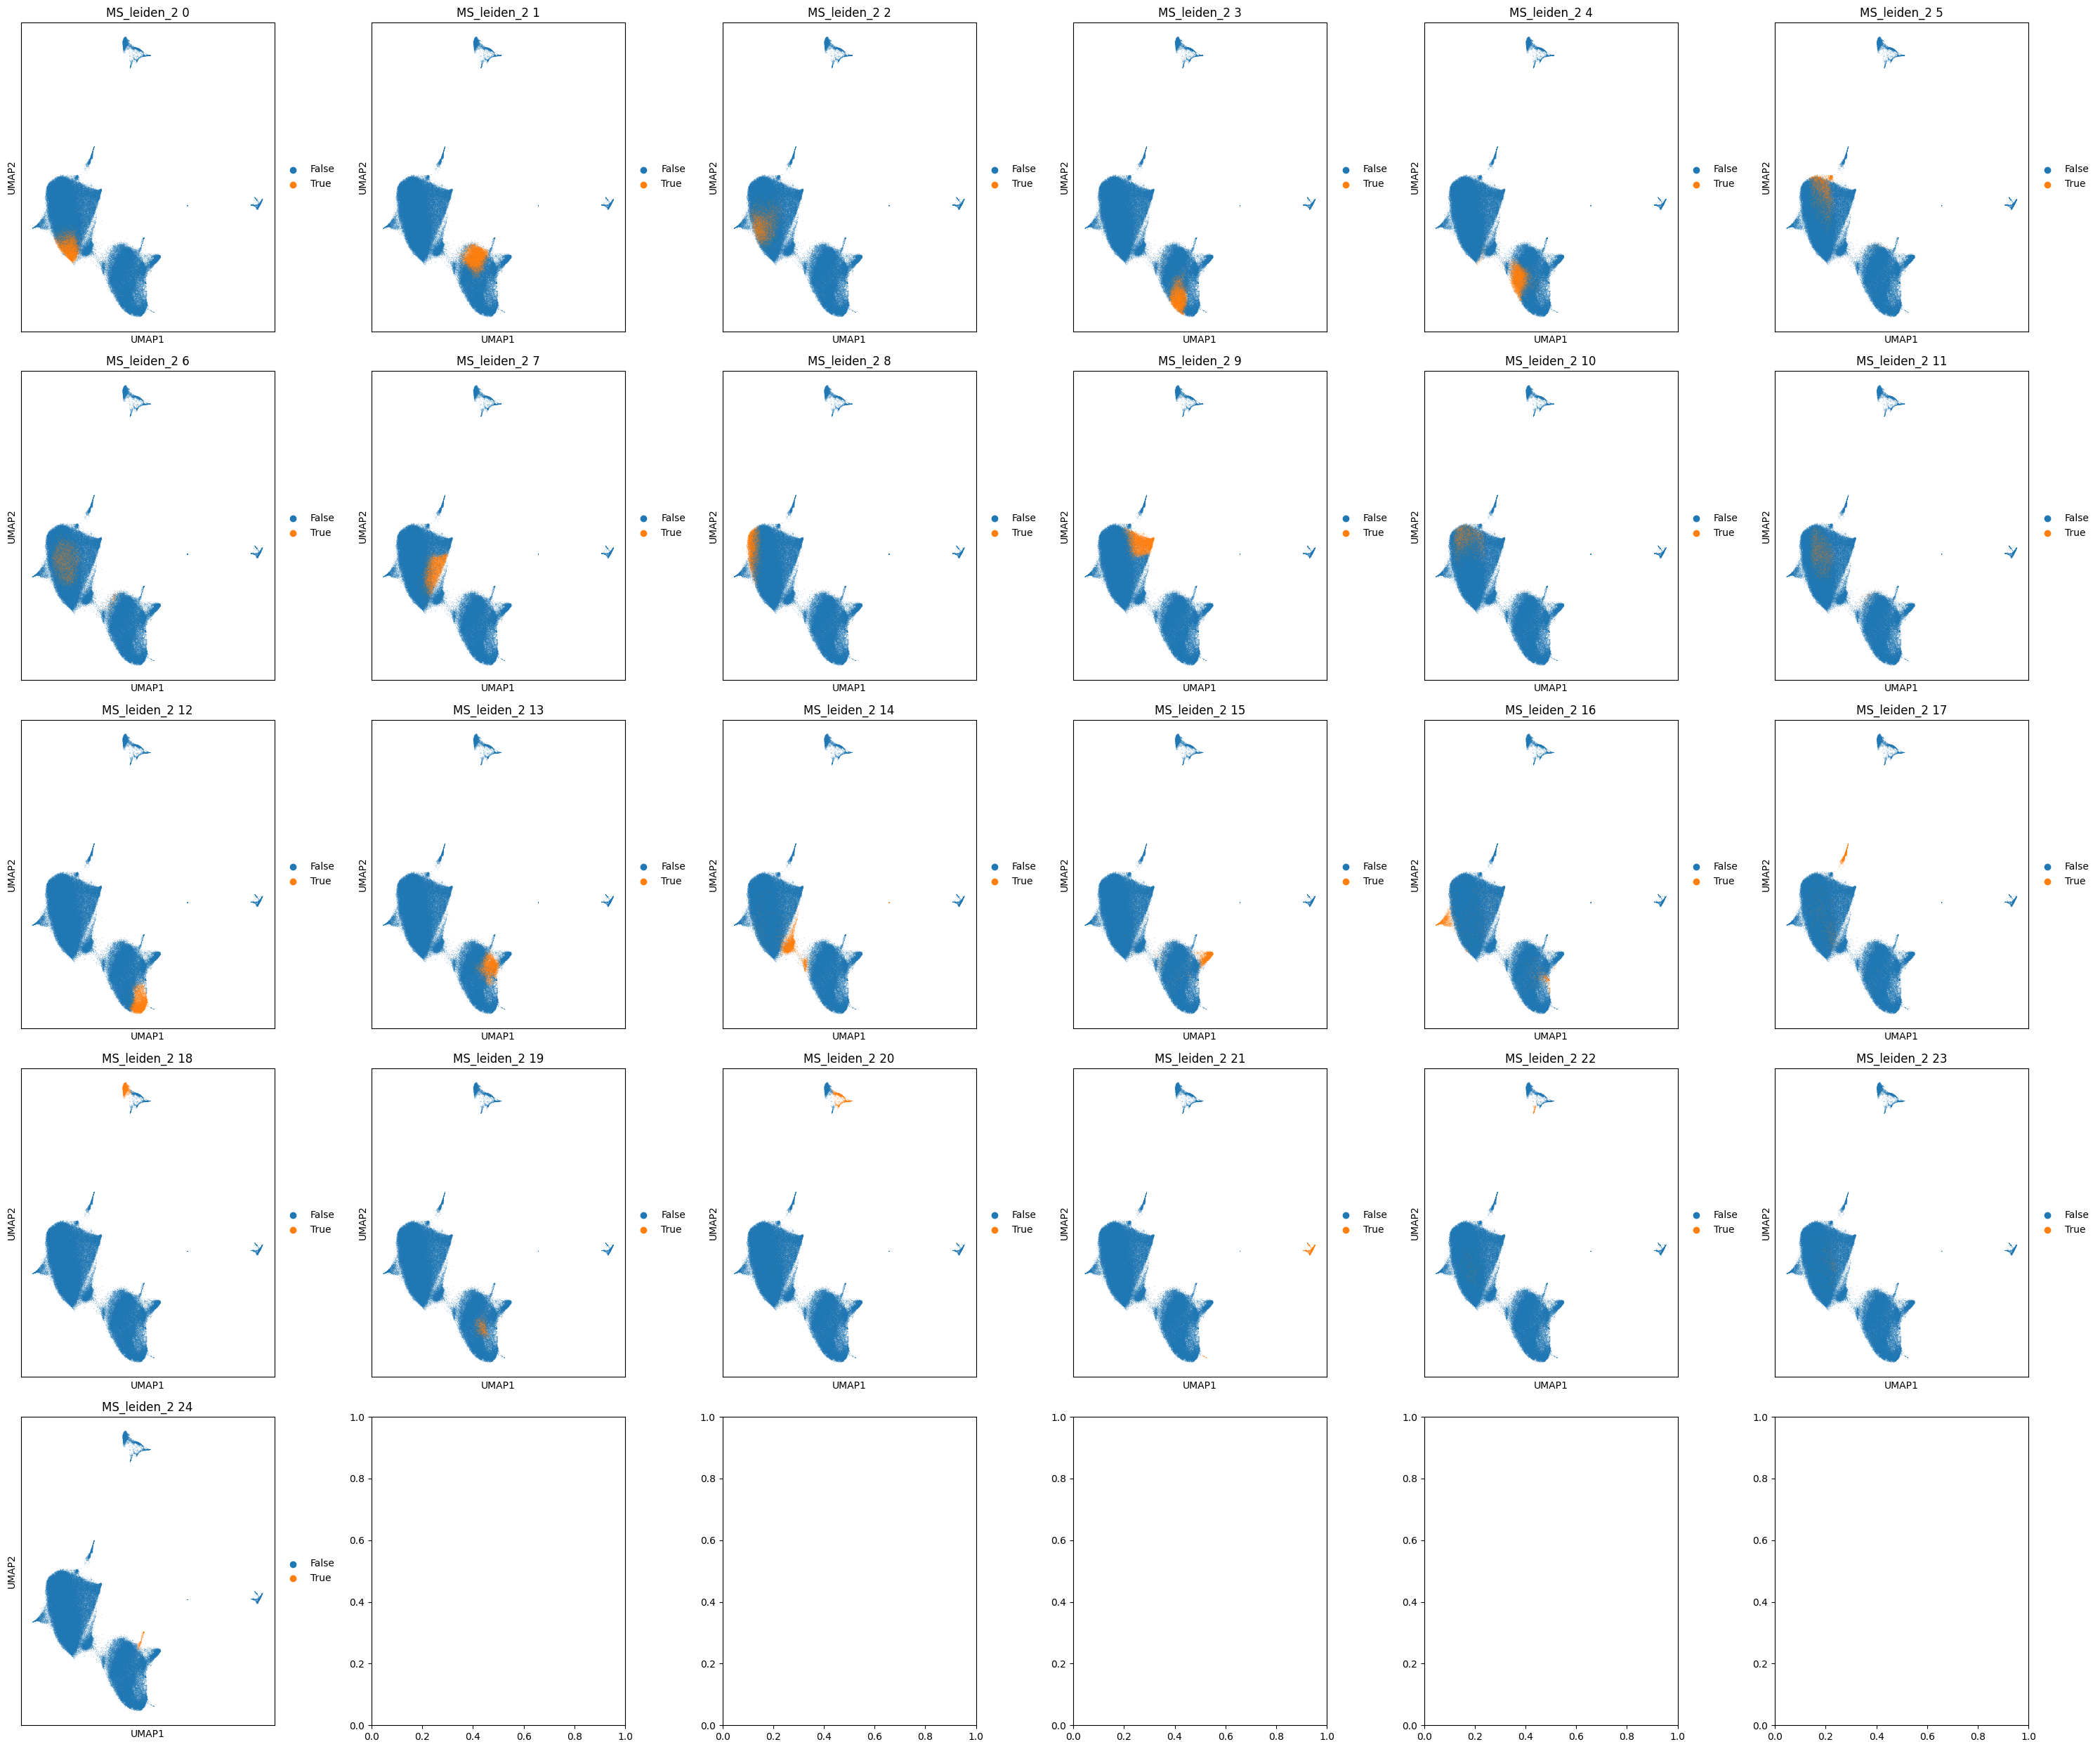

In [150]:
AIFI_L2_categories = adata.obs['ms_leiden_2'].cat.categories
 
n_categories = len(AIFI_L2_categories)
 
n_columns = 6 
n_rows = math.ceil(n_categories / n_columns)
 
fig, axs = plt.subplots(n_rows, n_columns, figsize=(5 * n_columns, 5 * n_rows))
 
for i, category in enumerate(AIFI_L2_categories):
    row = i // n_columns
    col = i % n_columns
    adata.obs['cluster_dummy'] = adata.obs['ms_leiden_2'] == category
    adata.obs['cluster_dummy']=[str(item) for item in adata.obs['cluster_dummy']]
    sc.pl.umap(adata, color='cluster_dummy', title=f'MS_leiden_2 {category}', ax=axs[row, col], show=False)
 
plt.tight_layout()
plt.show()

In [129]:
adata_check_freq=adata[adata.obs['leiden_resolution_2'].isin(check_freq)]
adata_check_freq

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


View of AnnData object with n_obs × n_vars = 4142 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_

In [418]:
naive_ISG = ["16"]

In [419]:
adata_naive_ISG=adata[adata.obs['leiden_resolution_2'].isin(naive_ISG)]

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [461]:
cluster17 = ["17"]
adata_cluster17=adata[adata.obs['leiden_resolution_2'].isin(cluster17)]

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [462]:
adata_cluster17

View of AnnData object with n_obs × n_vars = 3096 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_

In [471]:
adata_cluster17.obs['majority_voting_celltypist'].value_counts(normalize=True).head(10)

majority_voting_celltypist
Naive B cells               0.746770
Memory B cells              0.247739
Age-associated B cells      0.004522
Plasma cells                0.000646
Tcm/Naive helper T cells    0.000323
Name: proportion, dtype: float64

In [420]:
adata_naive_ISG

View of AnnData object with n_obs × n_vars = 3136 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_

In [91]:
allmem_MBCs = ["1", "4", "19", "3", "12", "24"]

In [92]:
allmem_MBCs=adata[adata.obs['ms_leiden_2'].isin(allmem_MBCs)]

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [94]:
allmem_MBCs.raw=allmem_MBCs

In [95]:
sc.pp.normalize_total(allmem_MBCs, target_sum=1e4)
sc.pp.log1p(allmem_MBCs)

In [96]:
sc.pp.highly_variable_genes(allmem_MBCs)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [97]:
igl_genes = [gene for gene in adata.var_names if gene.startswith("IGL")]
igk_genes = [gene for gene in adata.var_names if gene.startswith("IGK")]
ighc_genes = [gene for gene in adata.var_names if gene.startswith("IGH")]
exl_genes = igl_genes + igk_genes + ighc_genes

In [98]:
allmem_MBCs = allmem_MBCs[:, allmem_MBCs.var_names[allmem_MBCs.var['highly_variable']]]
filtered_genes = [gene for gene in allmem_MBCs.var_names if gene not in exl_genes]
allmem_MBCs = allmem_MBCs[:, filtered_genes]

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [99]:
sc.pp.scale(allmem_MBCs)
sc.tl.pca(allmem_MBCs, svd_solver='arpack')
sce.pp.harmony_integrate(allmem_MBCs, 'cohort.cohortGuid',max_iter_harmony = 30)
sc.pp.neighbors(allmem_MBCs, n_neighbors=50,use_rep='X_pca_harmony', n_pcs=30)
sc.tl.umap(allmem_MBCs,min_dist=0.05)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
2023-11-27 19:06:27,123 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-11-27 19:06:48,543 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-11-27 19:06:48,751 - harmonypy - INFO - Iteration 1 of 30
2023-11-27 19:07:15,136 - harmonypy - INFO - Iteration 2 of 30
2023-11-27 19:07:41,940 - harmonypy - INFO - Iteration 3 of 30
2023-11-27 19:08:07,597 - harmonypy - INFO - Iteration 4 of 30
2023-11-27 19:08:22,869 - harmonypy - INFO - Converged after 4 iterations


In [100]:
sc.tl.leiden(allmem_MBCs, resolution=2, key_added = "ms_leiden_2.5")

In [102]:
#write the memB cell object
#allmem_MBCs.write_h5ad('B_cell_files/memBcells_27112023.h5ad')

In [22]:
#START HERE FOR ALL MEMORY B CELLS!
allmem_MBCs=sc.read_h5ad('B_cell_files/memBcells_27112023.h5ad')

In [23]:
allmem_MBCs=allmem_MBCs.raw.to_adata()

In [24]:
allmem_MBCs

AnnData object with n_obs × n_vars = 47747 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_

In [25]:
sc.pp.normalize_total(allmem_MBCs, target_sum=1e4)
sc.pp.log1p(allmem_MBCs)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


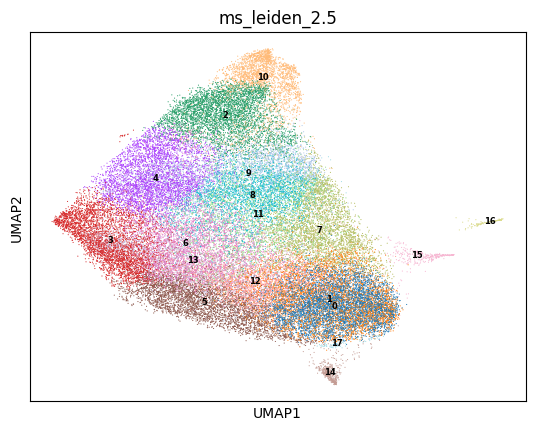

In [26]:
sc.pl.umap(allmem_MBCs, color = 'ms_leiden_2.5', legend_loc='on data', legend_fontsize=6)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


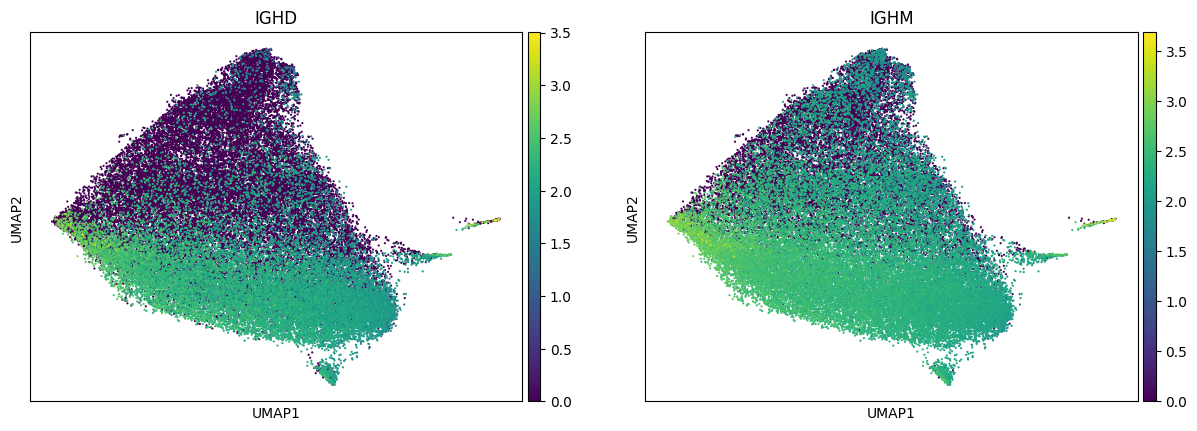

In [27]:
markers_t2 = ['IL4R', 'IGHE', 'FCER2', 'COCH', 'MEF2C']
markers_cd95 = ['FAS', 'ITGAX', 'AIM2', 'CD27']
non_switch_b = ['IGHD', 'IGHM']
early_mem = ['IGHD', 'IGHM', 'CD27', 'CD79B', 'FCGR2B', 'MEF2C', 'AIM2']
test = ['JUN', 'MYC', 'CD69', 'FOS']
#early_mem

sc.pl.umap(allmem_MBCs, color=non_switch_b, ncols=2, size=10, frameon=True)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


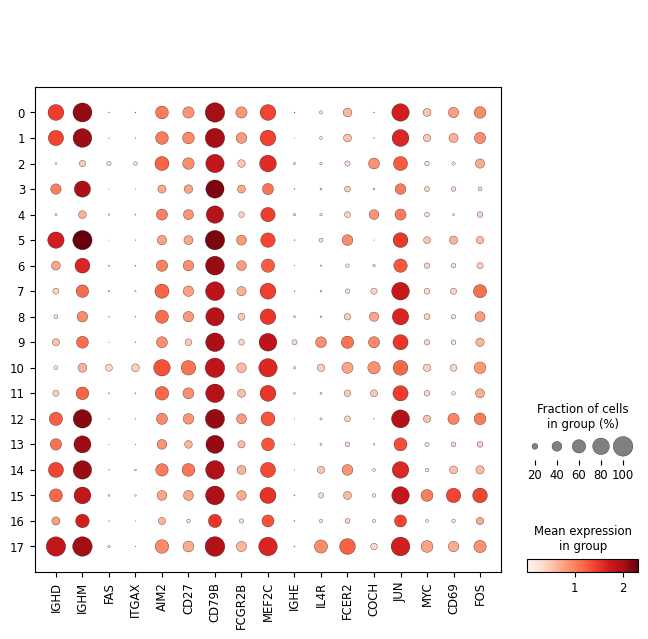

In [28]:
gene_test = ['IGHD', 'IGHM', 'FAS', 'ITGAX', 'AIM2', 'CD27', 'CD79B', 'FCGR2B', 'MEF2C', 'IGHE', 'IL4R', 'FCER2', 'COCH', 'JUN', 'MYC', 'CD69', 'FOS'] 
sc.pl.dotplot(allmem_MBCs, gene_test, groupby='ms_leiden_2.5')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignore

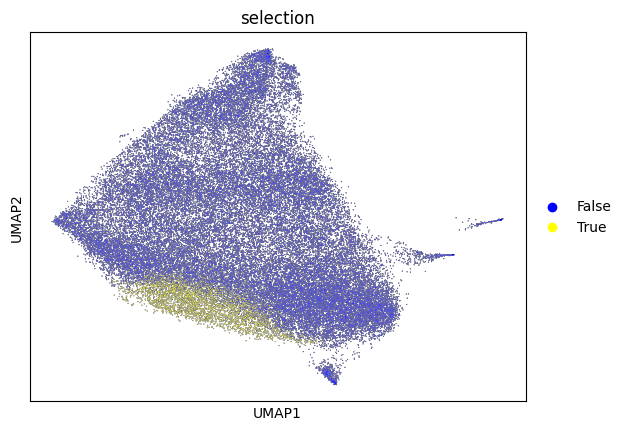

In [29]:
allmem_MBCs.obs['selection']=pd.Categorical(allmem_MBCs.obs['ms_leiden_2.5']=='5')
# adjust colors
allmem_MBCs.uns['selection_colors'] = ['blue', 'yellow']
sc.pl.umap(allmem_MBCs, color='selection', add_outline=True, s=1)

In [ ]:
#DONE!
sc.tl.rank_genes_groups(allmem_MBCs, 'ms_leiden_2.5', method='wilcoxon')
df_adata=sc.get.rank_genes_groups_df(allmem_MBCs, group=None)
df=df_adata.groupby('group').head(20).reset_index(drop=True)

groups = df.groupby('group')

fig, axs = plt.subplots(5, 6, figsize=(10, 14), squeeze=True)
# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(groups):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(str(name)+" vs Rest")
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')
fig.tight_layout()
plt.savefig('B_cell_files/memB_scatter_plot_27112023.png')

In [94]:
remaining_mem_MBCs = ["0", "1", "2", "3", "4", "6", "7", "8", "11", "12", "13", "14", "17"]

In [95]:
remaining_mem_MBCs=allmem_MBCs[allmem_MBCs.obs['ms_leiden_2.5'].isin(remaining_mem_MBCs)]

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [96]:
remaining_mem_MBCs.raw=remaining_mem_MBCs

In [97]:
sc.pp.normalize_total(remaining_mem_MBCs, target_sum=1e4)
sc.pp.log1p(remaining_mem_MBCs)

In [98]:
sc.pp.highly_variable_genes(remaining_mem_MBCs)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [99]:
igl_genes = [gene for gene in remaining_mem_MBCs.var_names if gene.startswith("IGL")]
igk_genes = [gene for gene in remaining_mem_MBCs.var_names if gene.startswith("IGK")]
ighc_genes = [gene for gene in remaining_mem_MBCs.var_names if gene.startswith("IGH")]
ighc_genes = ["IGHE", "IGHA1", "IGHA2", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHM", "IGHD"]
exl_genes = igl_genes + igk_genes

In [100]:
ighc_genes

['IGHE', 'IGHA1', 'IGHA2', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHM', 'IGHD']

In [101]:
remaining_mem_MBCs = remaining_mem_MBCs[:, remaining_mem_MBCs.var_names[remaining_mem_MBCs.var['highly_variable']]]
filtered_genes = [gene for gene in remaining_mem_MBCs.var_names if gene in ighc_genes]
remaining_mem_MBCs = remaining_mem_MBCs[:, filtered_genes]

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [102]:
remaining_mem_MBCs

View of AnnData object with n_obs × n_vars = 38284 × 9
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_

In [103]:
sc.pp.scale(remaining_mem_MBCs)
sc.tl.pca(remaining_mem_MBCs, svd_solver='arpack')
sce.pp.harmony_integrate(remaining_mem_MBCs, 'cohort.cohortGuid', max_iter_harmony = 30)
sc.pp.neighbors(remaining_mem_MBCs, n_neighbors=100, use_rep='X_pca_harmony', n_pcs=2)
sc.tl.umap(remaining_mem_MBCs, min_dist=2.5)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
2023-12-12 20:13:08,361 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-12-12 20:13:12,356 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-12-12 20:13:12,499 - harmonypy - INFO - Iteration 1 of 30
2023-12-12 20:13:28,378 - harmonypy - INFO - Iteration 2 of 30
2023-12-12 20:13:44,754 - harmonypy - INFO - Iteration 3 of 30
2023-12-12 20:14:01,077 - harmonypy - INFO - Iteration 4 of 30
2023-12-12 20:14:14,610 - harmonypy - INFO - Iteration 5 of 30
2023-12-12 20:14:18,966 - harmonypy - INFO - Iteration 6 of 30
2023-12-12 20:14:23,041 - ha

In [104]:
sc.tl.leiden(remaining_mem_MBCs, resolution=0.05, key_added = "ms_leiden_2.75")

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


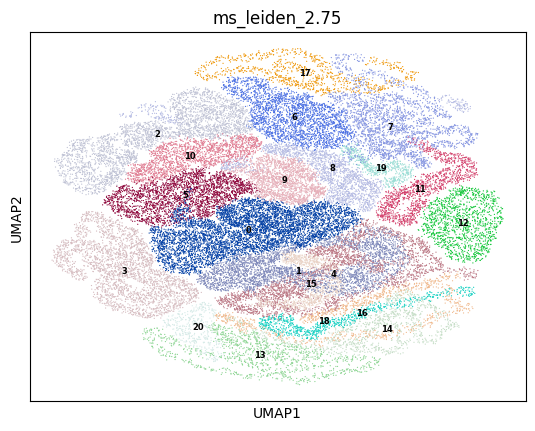

In [105]:
sc.pl.umap(remaining_mem_MBCs, color = 'ms_leiden_2.75', legend_loc='on data', legend_fontsize=6)

In [106]:
#write the remaining_memB cell object
remaining_mem_MBCs.write_h5ad('B_cell_files/remaining_mem_MBCs_05122023.h5ad')

In [107]:
#START HERE FOR ALL REMAINING MEMORY B CELLS!
remaining_mem_MBCs=sc.read_h5ad('B_cell_files/remaining_mem_MBCs_05122023.h5ad')

In [108]:
remaining_mem_MBCs=remaining_mem_MBCs.raw.to_adata()

In [109]:
remaining_mem_MBCs

AnnData object with n_obs × n_vars = 38284 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'seurat_pbmc_type', 'seurat_pbmc_type_score', 'umap_1', 'umap_2', 'well_id', 'subject.biologicalSex', 'subject.ethnicity', 'subject.partnerCode', 'subject.race', 'subject.subjectGuid', 'cohort.cohortGuid', 'sample.visitName', 'sample.visitDetails', 'subject.birthYear', 'CMV.IgG.Serology.Result.Interpretation', 'BMI', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'predicted.celltype.l2.5.score', 'predicted.celltype.l2.5', 'predicted_labels_celltypist', 'majority_voting_celltypist', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_

In [110]:
sc.pp.normalize_total(remaining_mem_MBCs, target_sum=1e4)
sc.pp.log1p(remaining_mem_MBCs)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


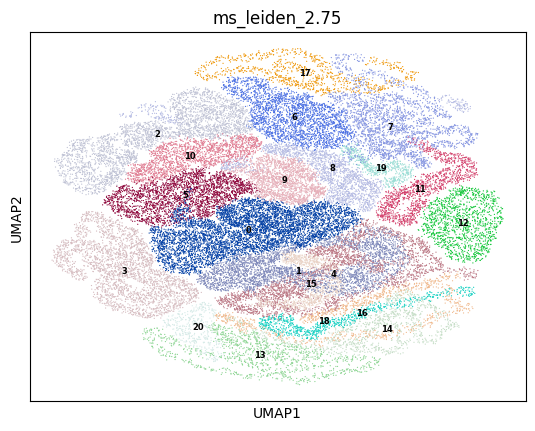

In [111]:
sc.pl.umap(remaining_mem_MBCs, color = 'ms_leiden_2.75', legend_loc='on data', legend_fontsize=6)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


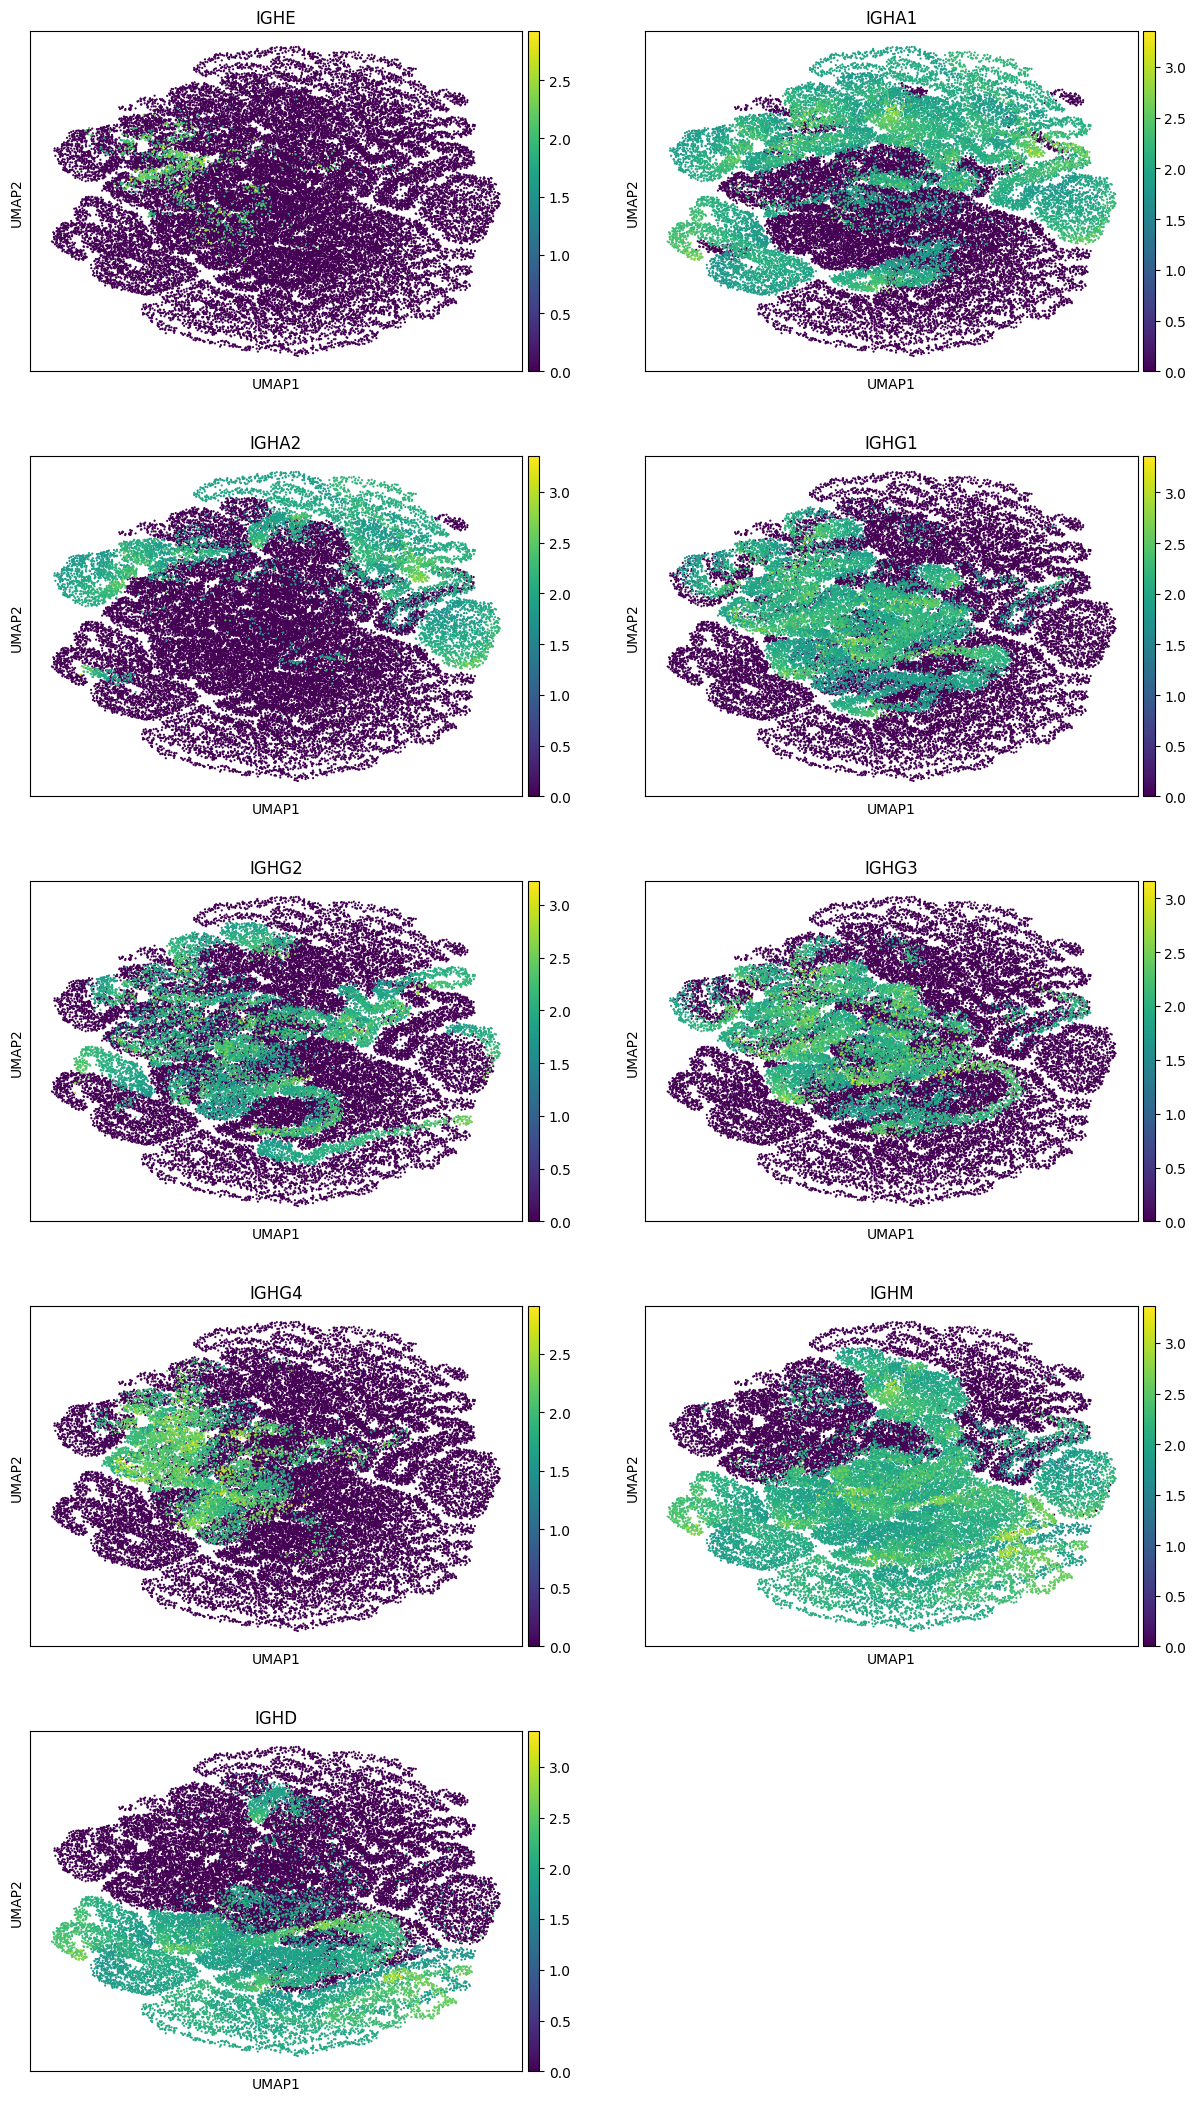

In [112]:
markers_switch = ['IGHD', 'IGHM', 'IGHA1', 'IGHG1']

sc.pl.umap(remaining_mem_MBCs, color=ighc_genes, ncols=2, size=10, frameon=True)

/tmp/ipykernel_432/1890172496.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab10', len(clusters))
/opt/conda/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)
/opt/conda/lib/python3.10/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "


<Figure size 640x480 with 0 Axes>

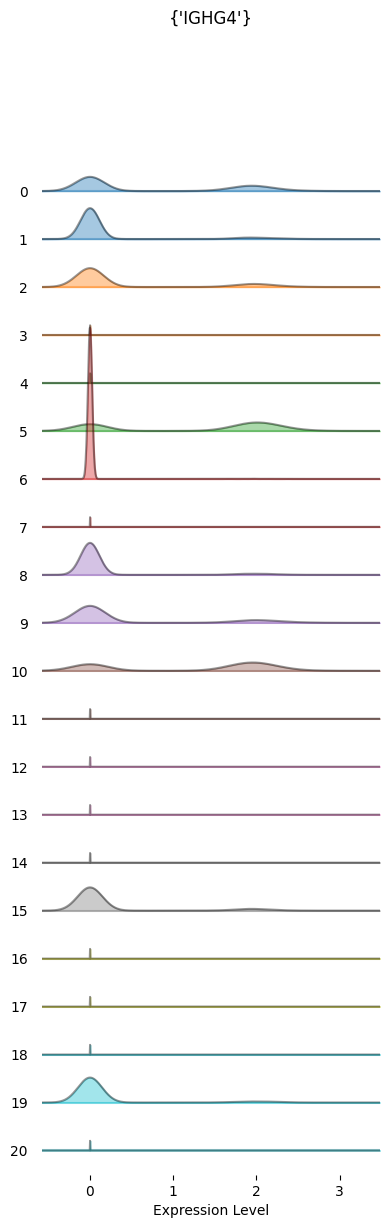

In [123]:
from joypy import joyplot
import matplotlib.cm as cm


genes_of_interest = ["IGHG4"]

# Convert the AnnData object to a DataFrame
adata_df = remaining_mem_MBCs.to_df()
adata_df['Cluster'] = remaining_mem_MBCs.obs['ms_leiden_2.75']

# Get unique clusters and assign colors from a palette
clusters = remaining_mem_MBCs.obs['ms_leiden_2.75'].cat.categories
color_map = cm.get_cmap('tab10', len(clusters))

for gene in genes_of_interest:
    gene_df = adata_df[[gene, 'Cluster']]

    plt.figure()
    joyplot(
        data=gene_df,
        by='Cluster',
        column=gene,
        color=[color_map(i) for i in range(len(clusters))],
        alpha=0.4,
        overlap=2,
        figsize = (4, 12)
    )

    # Add title and labels
    plt.title({gene})
    plt.xlabel('Expression Level')
    plt.ylabel('Clusters')

    plt.show()

#sc.pl.violin(remaining_mem_MBCs, keys=gene_of_interest, groupby='ms_leiden_2.75', jitter=0, rotation=0, ncols=1)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_421/2960077166.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df=df_adata.groupby('group').head(20).reset_index(drop=True)
/tmp/ipykernel_421/2960077166.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby('group')


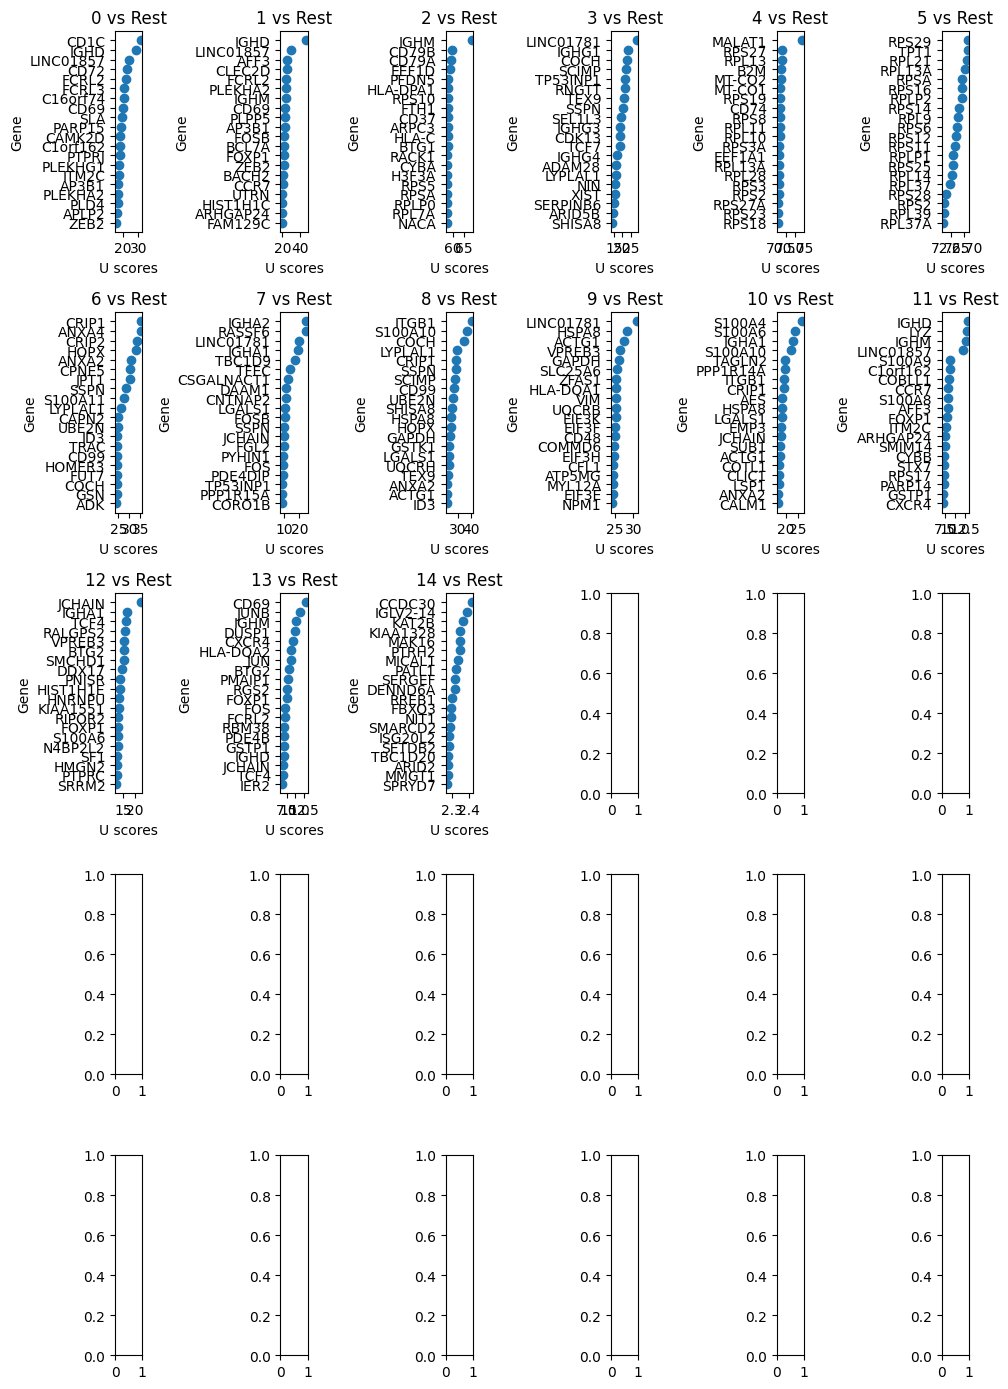

In [42]:
#DONE!
sc.tl.rank_genes_groups(remaining_mem_MBCs, 'ms_leiden_2.75', method='wilcoxon')
df_adata=sc.get.rank_genes_groups_df(remaining_mem_MBCs, group=None)
df=df_adata.groupby('group').head(20).reset_index(drop=True)

groups = df.groupby('group')

fig, axs = plt.subplots(5, 6, figsize=(10, 14), squeeze=True)
# Loop through each group and create a scatter plot in the corresponding subplot
for i, (name, group) in enumerate(groups):
    row, col = i // 6, i % 6
    axs[row, col].scatter(group['scores'], group['names'])
    axs[row, col].invert_yaxis()
    axs[row, col].set_title(str(name)+" vs Rest")
    axs[row, col].set_xlabel('U scores')
    axs[row, col].set_ylabel('Gene')
fig.tight_layout()
plt.savefig('B_cell_files/remaining_mem_MBCs_scatter_plot_04122023.png')